In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
# plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')


# load data


In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
columns=boston_dataset.feature_names
boston_df = pd.DataFrame(boston_dataset.data, columns=columns)
target = boston_dataset.target
boston_df['MEDV'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#conunt missing value
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

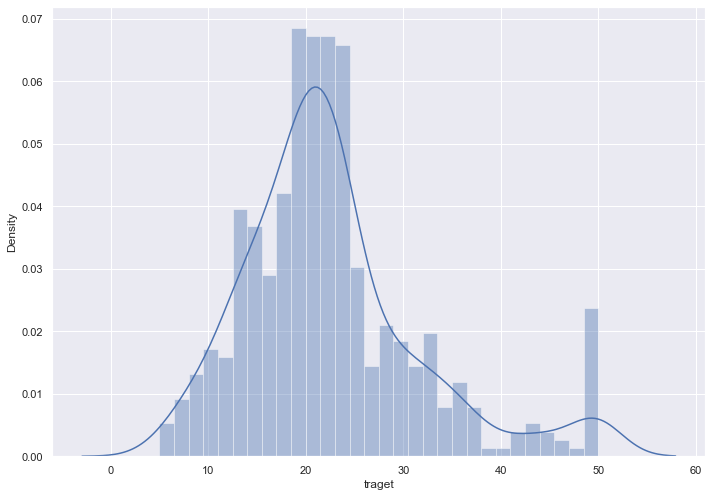

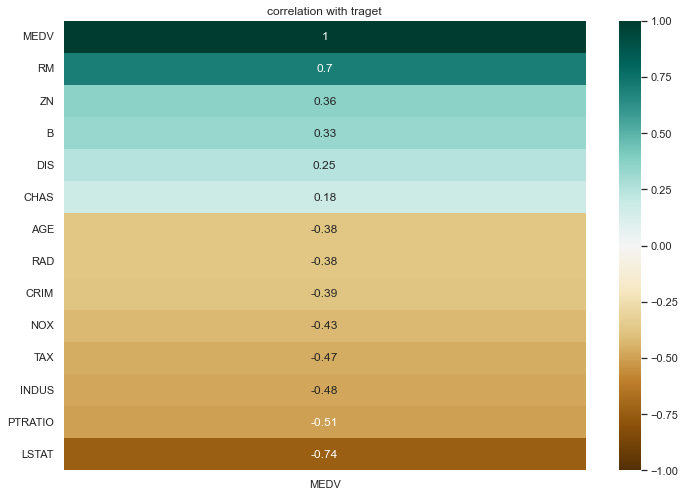

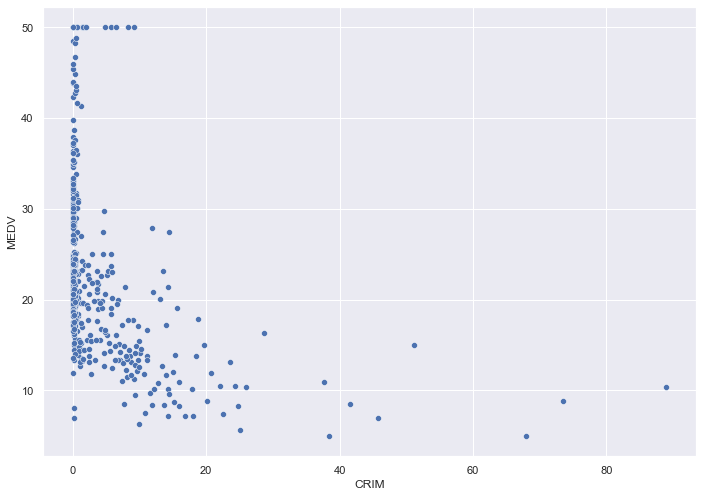

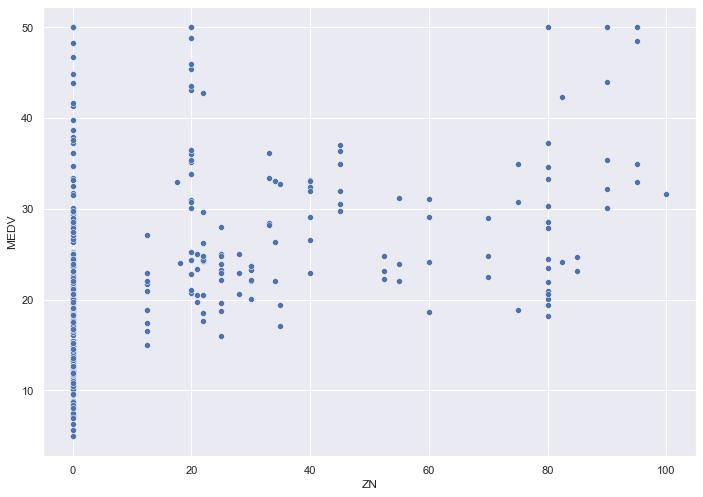

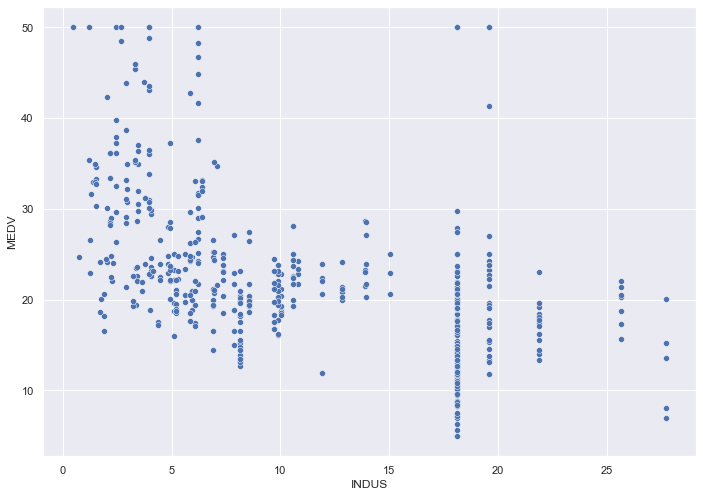

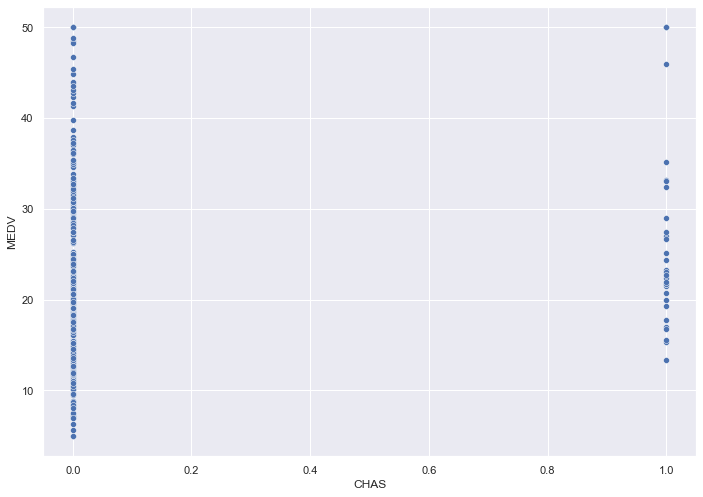

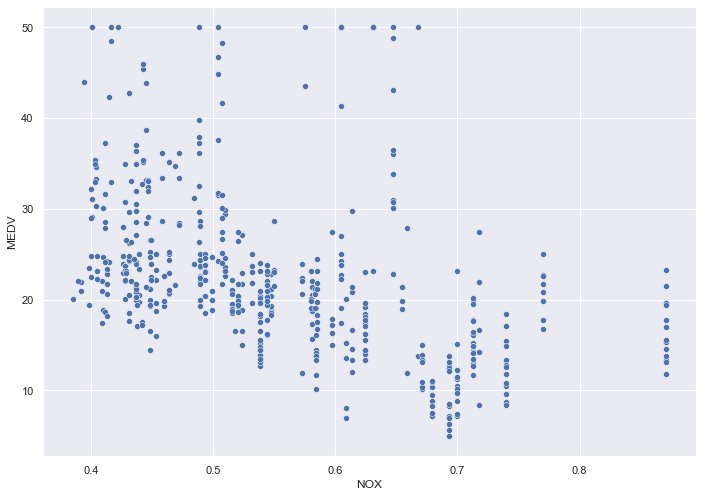

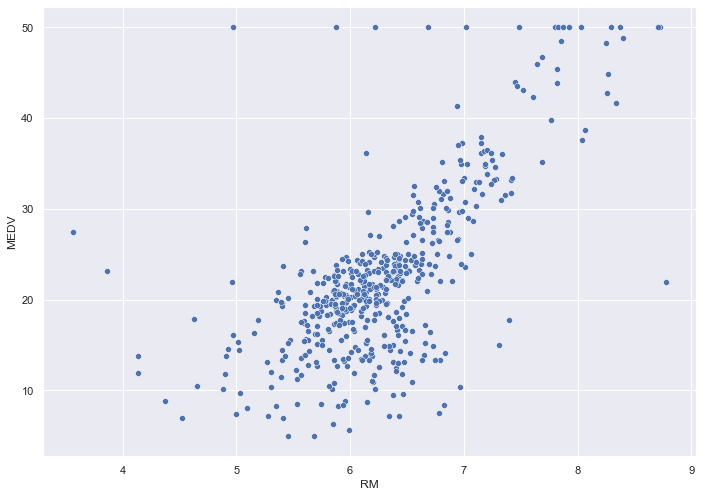

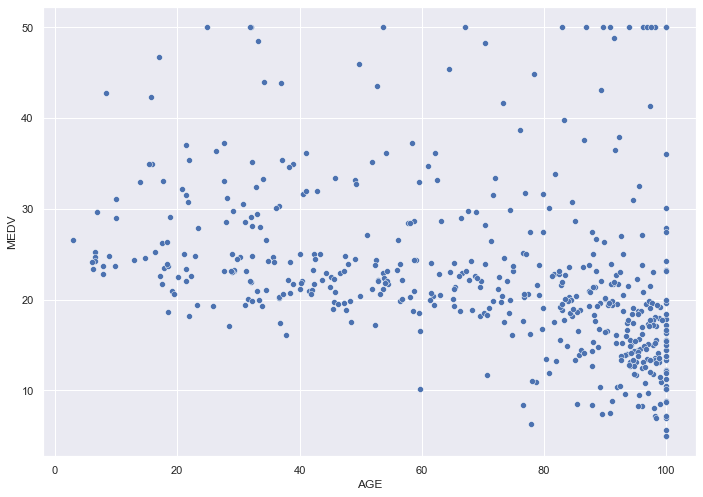

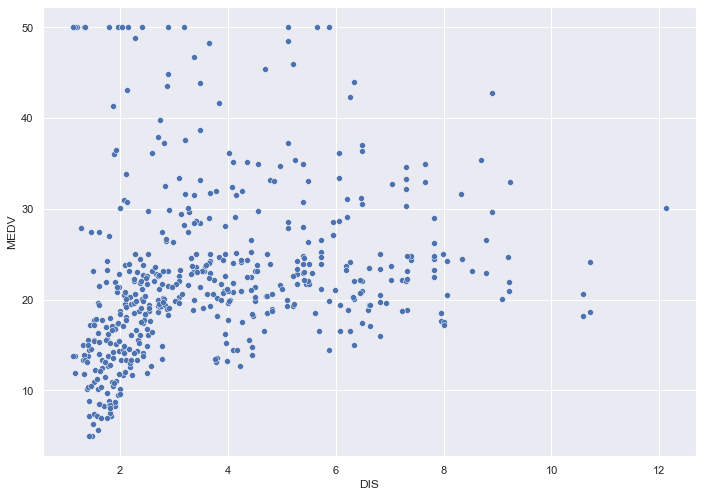

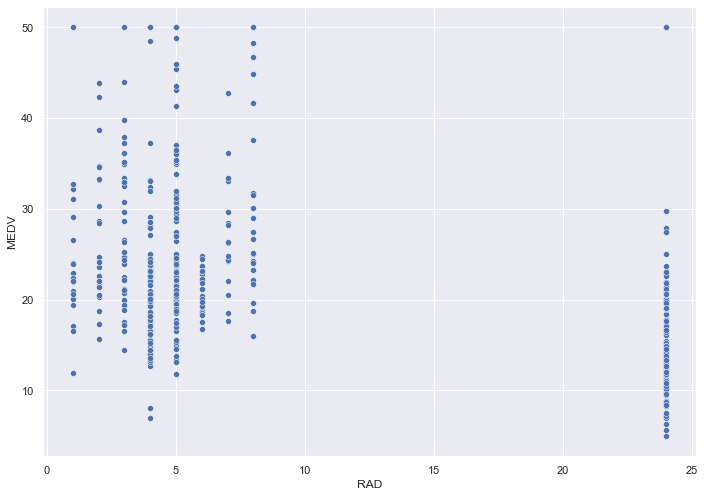

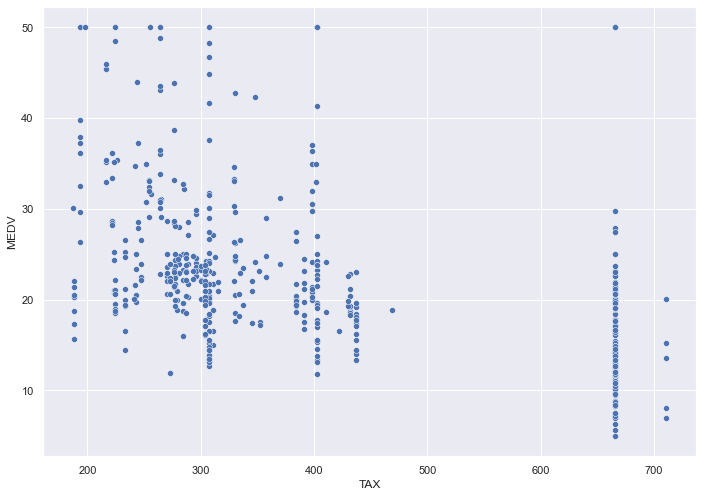

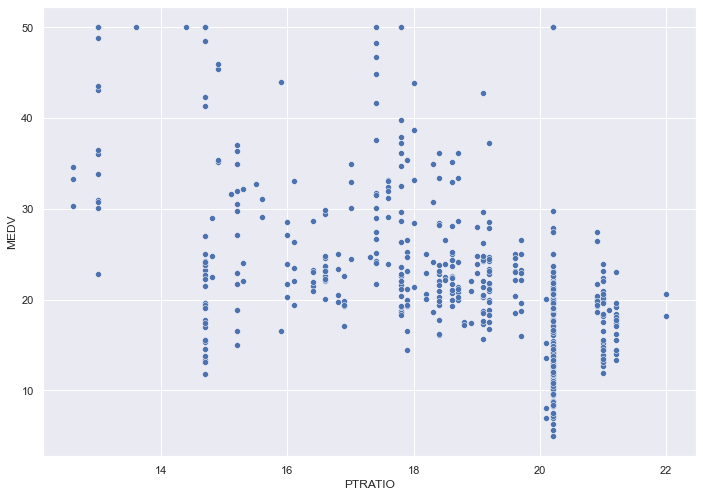

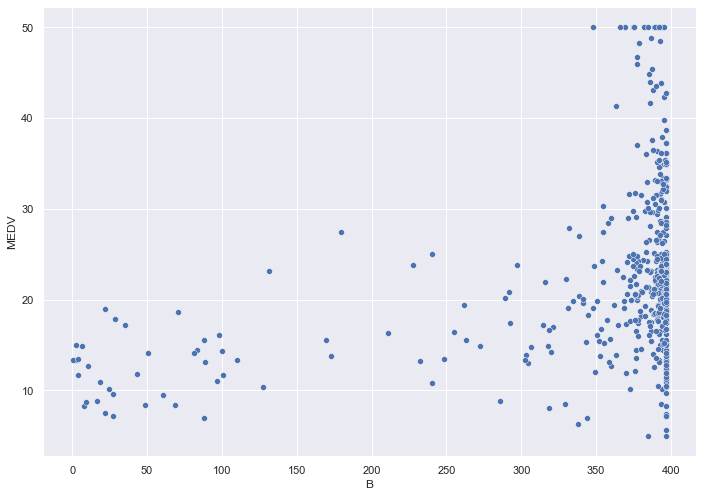

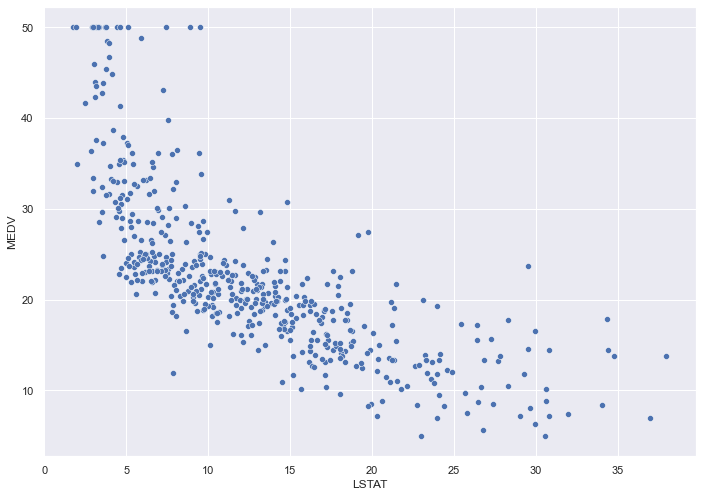

In [4]:
#plot the distribution of the target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(target, bins=30)
plt.xlabel('traget')
plt.show()

#correlation with traget
sns.heatmap(boston_df.corr()[['MEDV']].sort_values(by='MEDV', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('correlation with traget')
plt.show()

#relation with traget
for col in columns:
    sns.scatterplot(x=boston_df[col], y=target, marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()


# split data to train and test


In [5]:
training_data = boston_df.sample(frac=0.8, random_state=5)
testing_data = boston_df.drop(training_data.index)

y_train_df = training_data['MEDV']
y_test_df = testing_data['MEDV']

X_train_df = training_data.drop(columns='MEDV')
X_test_df = testing_data.drop(columns='MEDV')

In [6]:
#preprocess:

# main body of code

In [7]:
#normalization
def normalize(df):
    return (df-df.min())/(df.max()-df.min())
#     return (df-df.mean())/df.std()

#Find optimal parameters
def find_theta(X, y):
    m = X.shape[0] # Number of training examples. 
    X = np.append(X, np.ones((m,1)), axis=1) # Appending a cloumn of ones in X to add the bias term.
    y = y.reshape(m,1) # reshaping y to (m,1)
    # The Normal Equation:
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y)) 
    return theta

#Predict Function
def predict(X, theta): 
    X = np.append(X, np.ones((X.shape[0],1)), axis=1) # Appending a cloumn of ones in X to add the bias term.
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)
    return preds

#return mean squared error
def MSE(y, y_pred):
    return np.mean((y-y_pred)**2)

#find features have max correlation
def find_max_corrilations(df, measure_corrliation):
    #Correlation with output variable
    
    cor_target = abs(df.corr()["MEDV"])
    sns.heatmap(df.corr()[['MEDV']].sort_values(by='MEDV', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    plt.title('correlation with traget')
    
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target >= measure_corrliation]
    relevant_features = relevant_features.drop(labels='MEDV')
    relevant_features = relevant_features.index
    relevant_features = relevant_features.to_numpy()
    print('features with max correlation :',relevant_features,end='\n\n')
    return relevant_features 

#plotting y and y predicted based on features
def plotting(X_train, y_train, y_train_preds, X_test, y_test,y_test_preds, features):
    # target = boston['MEDV']
    for i, col in enumerate(features):
        plt.figure(figsize=(12,4))
        
#         plt.subplot(2, 2, 1)
        plt.subplot(1, 2, 1)
        x = X_train[:,i]
        y = y_train
        sns.scatterplot(x, y, label='y', color='b')
#         plt.title('X train and train')
        plt.title('train')
#         plt.xlabel(col)
#         plt.ylabel('MEDV')
#         plt.subplot(2, 2, 2)

        y = y_train_preds[:,0]
        sns.scatterplot(x, y, label='y predicted', color='r')
#         plt.title('X train and y train predicted')
        plt.xlabel(col)
        plt.ylabel('MEDV')

#         plt.subplot(2, 2, 3)
        plt.subplot(1, 2, 2)
        x = X_test[:,i]
        y = y_test
        sns.scatterplot(x, y, label='y', color='g')
#         plt.title('X test and y test')
        plt.title('test')
        plt.xlabel(col)
        plt.ylabel('MEDV')
#         plt.subplot(2, 2, 4)

        y = y_test_preds[:,0]
        sns.scatterplot(x, y,label='y predicted', color='y')
#         plt.title('X test and y test predicted')
#         plt.xlabel(col)
#         plt.ylabel('MEDV_pred')
        plt.tight_layout()
        plt.show()      



y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

#training model and show all results that required
def hamechi(X_train_df, X_test_df, measure_corrliation=0.5):
    df = X_train_df.copy()
    df['MEDV'] = y_train_df
    features = find_max_corrilations(df, measure_corrliation)
    
    X_train = X_train_df.to_numpy()
    X_test = X_test_df.to_numpy()

    print('shape X_train :', X_train.shape)
    print('shape X_test :', X_test.shape)
    print('shape y_train :', y_train.shape)
    print('shape y_test :', y_test.shape, end='\n\n')

    theta = find_theta(X=X_train, y=y_train)
    print('optimal weight parameters :', theta.reshape(-1),end='\n\n')

    y_train_preds = predict(X=X_train, theta=theta)
    print('y_train_shape :', y_train_preds.shape)
    print('training error :', np.sqrt(MSE(y_train, y_train_preds)), end='\n\n')

    y_test_preds = predict(X_test, theta)
    print('test error :',MSE(y_test, y_test_preds), end='\n\n')

    plotting(X_train, y_train, y_train_preds, X_test, y_test,y_test_preds, features)   

# linear regression model


features with max correlation : ['RM' 'PTRATIO' 'LSTAT']

shape X_train : (405, 13)
shape X_test : (101, 13)
shape y_train : (405,)
shape y_test : (101,)

optimal weight parameters : [-8.44320561e-02  4.18782268e-02  6.22269838e-02  2.90569184e+00
 -1.82327246e+01  3.91927821e+00  8.44571645e-03 -1.37316769e+00
  2.82647031e-01 -1.15448004e-02 -8.99481174e-01  9.04064329e-03
 -5.80029339e-01  3.42176205e+01]

y_train_shape : (405, 1)
training error : 12.006646449563032

test error : 162.77888977097885



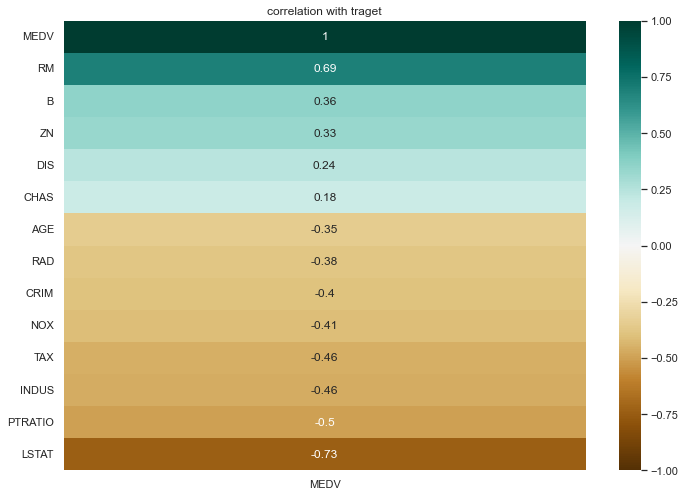

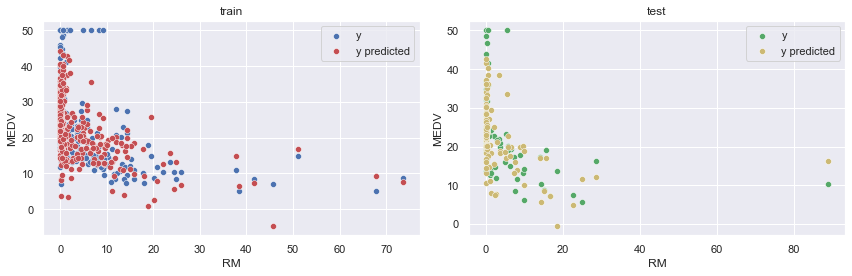

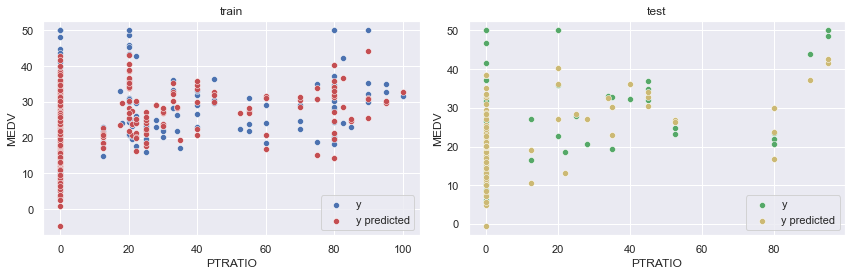

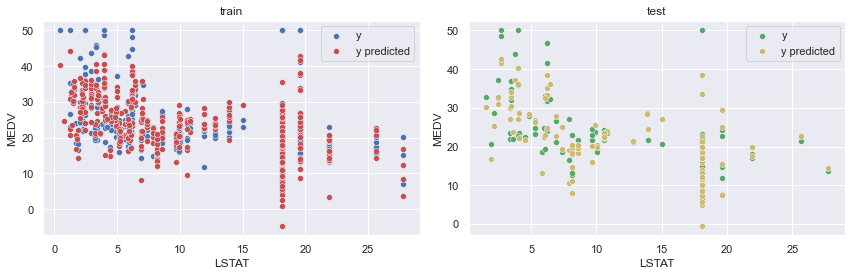

In [8]:
hamechi(X_train_df=X_train_df, X_test_df=X_test_df)

# polynomial regression model


features with max correlation : ['RM' 'LSTAT' 'RM^2' 'LSTAT^2']

shape X_train : (405, 26)
shape X_test : (101, 26)
shape y_train : (405,)
shape y_test : (101,)

optimal weight parameters : [ 1.35711311e+13 -2.58795162e+14  4.08872445e+14  1.44259303e+20
  1.62816000e+05 -3.06688000e+05 -1.18800000e+03  3.15840000e+04
  1.52480000e+04 -2.69750000e+02  1.16096000e+05 -2.63250000e+02
  9.61600000e+03 -1.76250000e+01  7.53125000e+00  1.88500000e+02
 -1.44403418e+20 -1.99040000e+04  2.45440000e+04  1.02656250e+01
 -2.81600000e+03 -6.51000000e+02  3.88183594e-01 -3.24800000e+03
  5.40039062e-01 -2.88500000e+02 -2.39360000e+05]

y_train_shape : (405, 1)
training error : 3.859394031881975e+16

test error : 1.2305021508577262e+33



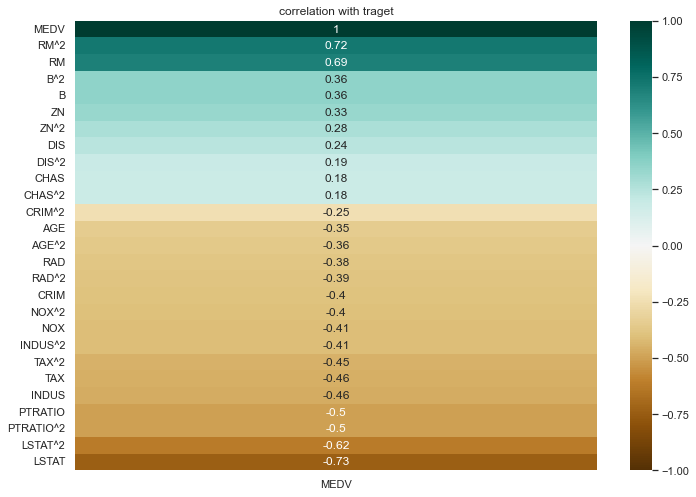

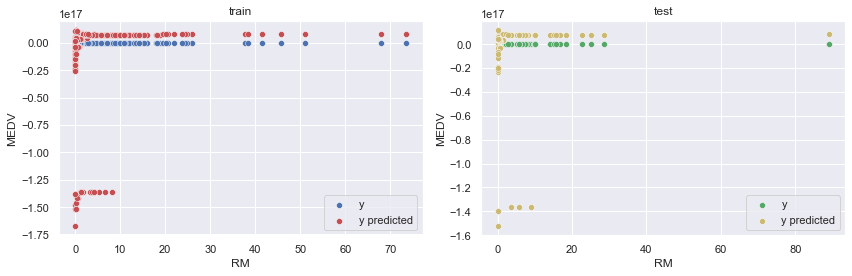

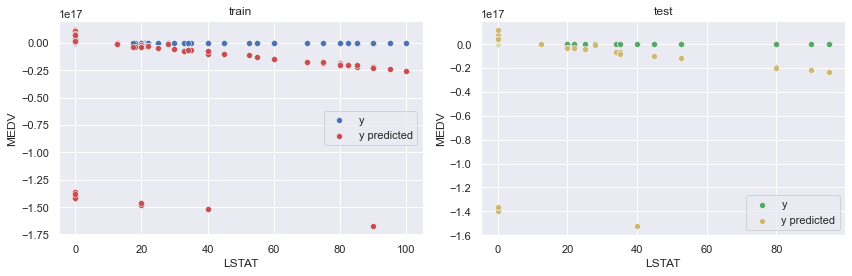

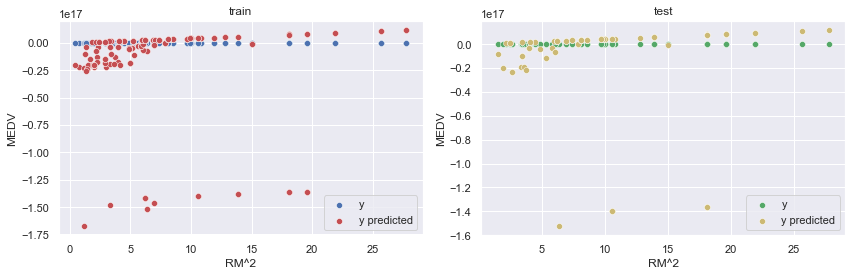

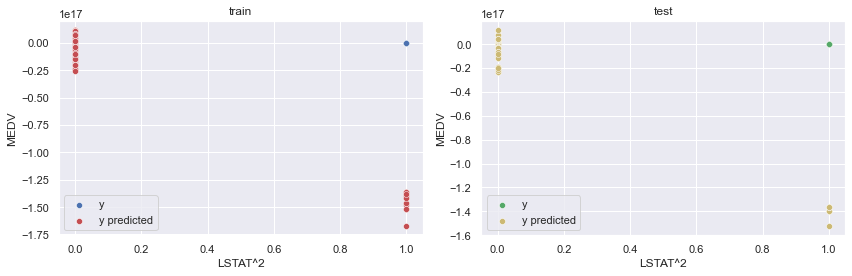

In [9]:
X_train_df2 = X_train_df.copy()
X_test_df2 = X_test_df.copy()
for col in columns:
    X_train_df2[col+'^2'] = X_train_df2[col]**2
    X_test_df2[col+'^2'] = X_test_df2[col]**2 
hamechi(X_train_df=X_train_df2, X_test_df=X_test_df2, measure_corrliation=0.6)

# radial basis function regression model(RBF krenel)


features with max correlation : ['RM']

shape X_train : (405, 13)
shape X_test : (101, 13)
shape y_train : (405,)
shape y_test : (101,)

optimal weight parameters : [-1.45175670e+00 -2.76346203e+00 -6.52059398e+00 -8.52474599e+00
  1.32561438e+02 -1.27339577e+01  1.90717236e+00  4.58766079e-01
  2.49432194e+01  4.62423714e+04  4.63324053e+00 -3.97085544e+00
 -2.72253884e+00 -9.18542882e+01]

y_train_shape : (405, 1)
training error : 10.3875936961843

test error : 109.51606490101292



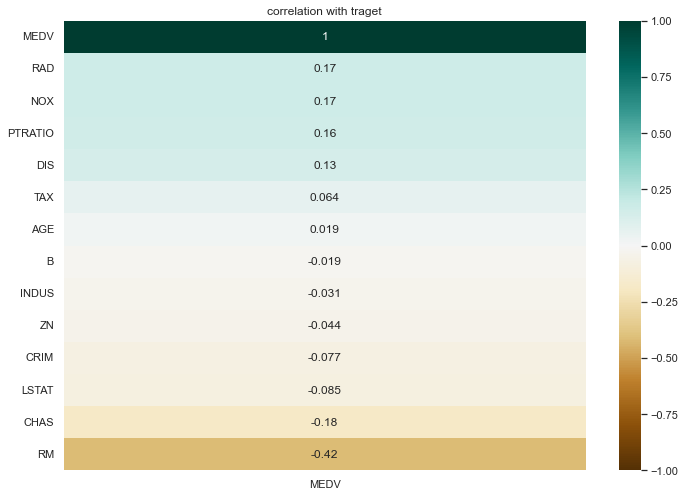

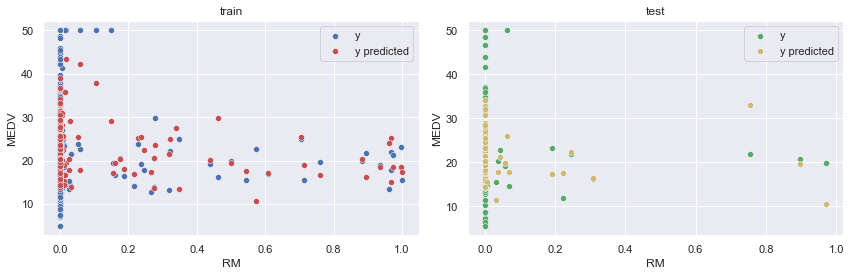

In [12]:
#this function is removed columns that zero
def removing_zero_column(df):
    return df.loc[:, (df != 0).any(axis=0)]

X_train_df3 = pd.DataFrame()
X_test_df3 = pd.DataFrame()
def gaussian_basis(x, mu, s=1):
    return np.exp((np.linalg.norm(mu-x)**2)/-(s*s))
for col in columns:
#     m_train = X_train_df[col].sample(n=1,random_state=43)
#     m_test = X_test_df[col].sample(n=1,random_state=43)
    m_train = X_train_df[col].mean()
    m_test = X_test_df[col].mean()
    X_train_df3[col] = X_train_df[col].apply(lambda x : gaussian_basis(x, m_train))
    X_test_df3[col] = X_test_df[col].apply(lambda x : gaussian_basis(x, m_test))
    
hamechi(X_train_df=X_train_df3, X_test_df=X_test_df3, measure_corrliation=0.4)

# explain
با توجه به میزان خطای آموزش و تست به نظر مدل چند جمله ای  بهتر از سایر مدل ها عمل میکند 
